In [ ]:
#explore different features for conversation booking rate prediction
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import pylab as pl
import seaborn as sns
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import analytics_lib
from analytics_lib import Bucket_BR_Plot
from analytics_lib.Bucket_BR_Plot import *
from analytics_lib.add_column import add_column
import modeldata
from modeldata.importdata_afterDV import *
from analytics_lib.GenerateCBRCI import GenerateCBRCI
from analytics_lib.import_training_data import get_feature_from_database

In [ ]:
data_dir = '/Users/wendyshi/Development/Post_DV_Data'
date_stamp = '2017-07-01'

## download data

In [ ]:
df = get_feature_from_database(data_dir=data_dir,start_date=date_stamp,force_download=False,purpose = 'training')

## Generate new feature rover_dv_pct to show how much information is coming from DV

In [11]:
from analytics_lib.get_training_conversation import get_training_conversation
from analytics_lib.gen_color_df import gen_color_df 

df_training = get_training_conversation(df)
# get rid of need_booked conversations in training set
df_training = df_training.drop(df_training[(df_training.booked == False) &(df_training.need_booked == True)].index)
df_training = df_training.drop(df_training[(df_training.provider_type == 'unmigrated')].index)
df_training = df_training.rename(columns = {'provider_all_requests':'all_requests_provider'})
from analytics_lib.gen_color_df import gen_color_df 
df_training = gen_color_df(df_training)
df_training.to_csv(os.path.join(data_dir,'DB_training_post_'+date_stamp+'.csv'))

In [12]:
from analytics_lib.get_training_conversation import get_training_conversation
ob = get_training_conversation(df,'overnight-boarding')
from analytics_lib.gen_color_df import gen_color_df 
ob = gen_color_df(ob)

In [38]:
df['ratio2'] = 1.0/df.rover_imported_ratio
df.loc[pd.isnull(df.ratio2),'ratio2'] = 0
df.loc[df.ratio2>100,'ratio2'] =1

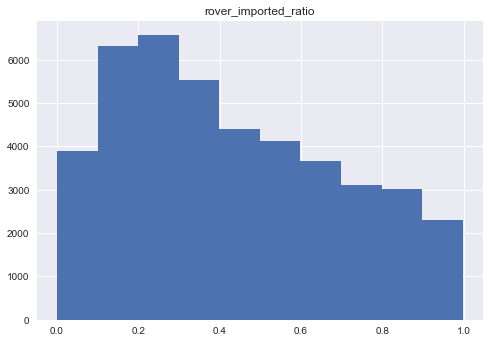

In [45]:
df_training[(df_training.service_type=='overnight-boarding') & (df_training.rover_imported_ratio<1)][['rover_imported_ratio','provider_type']].hist()
plt.show()

## Consolidate the setting files

In [56]:
fillna_df = pd.DataFrame(columns = ['service_type','feature_name','matriculation_level','fill_value'])
fillna_fn = 'Setting_fill_nan_R2BModel.csv'
for st in df_training.service_type.unique():
    fn = 'features_fill_nan_settings_'+st+'.csv'
    sub = pd.read_csv(os.path.join(data_dir,fn))
    sub['service_type'] = st
    fillna_df = fillna_df.append(sub)
fillna_df.to_csv(os.path.join(data_dir,fillna_fn))

In [57]:
clip_df = pd.DataFrame(columns = ['service_type','feature_name','min_clip','max_clip'])
clip_fn = 'Setting_clipping_R2BModel.csv'
for st in df_training.service_type.unique():
    fn = 'features_clipped_settings_'+st+'.csv'
    sub = pd.read_csv(os.path.join(data_dir,fn))
    sub['service_type'] = st
    clip_df = clip_df.append(sub)
clip_df.to_csv(os.path.join(data_dir,clip_fn))